In [1]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
#task 1
data = pd.read_csv('iris_data.csv', sep=";")
labels=pd.read_csv('iris_labels.csv', sep=";")
# print(data.shape)
# print(data.info())
print(data)
# print(labels.info())
data = pd.merge(data,labels,on="id",how="inner")
data.drop(["examiner"],axis=1,inplace=True)
data = data.sort_values("species")
# grid = sns.pairplot(data,hue="species")
# grid.figure.show()

pivot = data.pivot_table(
    values="sl",
    index="species",
    aggfunc=["mean", "std"]
) 
print(pivot[["mean","std"]])


       pl   pw   sl   sw    id
0     5.0  3.5  1.3  0.3     1
1     4.8  3.0  1.4  0.2     2
2     4.7  3.2  1.3  0.2     3
3     4.6  3.2  1.5  0.2     4
4     4.9  3.4  1.3  0.2     5
...   ...  ...  ...  ...   ...
6495  5.9  2.0  3.9  1.0  9963
6496  6.0  2.8  4.3  1.5  9979
6497  5.3  2.3  3.6  1.0  9982
6498  6.0  3.4  4.6  1.7  9986
6499  6.2  2.9  4.6  1.6  9992

[6500 rows x 5 columns]
                      mean         std
                        sl          sl
species                               
Iris-setosa     -11.917633  364.980932
Iris-versicolor   4.320000    2.141226
Iris-virginica   -1.164300  258.272735


In [3]:
# task 2
print(data.value_counts("species"))

species
Iris-setosa        3000
Iris-virginica     3000
Iris-versicolor     500
Name: count, dtype: int64


                     mean       std
                       sl        sl
species                            
Iris-setosa      1.416255  0.189330
Iris-versicolor  4.320000  2.141226
Iris-virginica   5.505370  0.551209
                     mean       std
                       sl        sl
species                            
Iris-setosa      1.416255  0.189330
Iris-versicolor  4.226453  0.457974
Iris-virginica   5.505307  0.551364


C:\Users\otto.hammar\AppData\Local\Temp\ipykernel_14948\858832681.py:21: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  grid.figure.show()


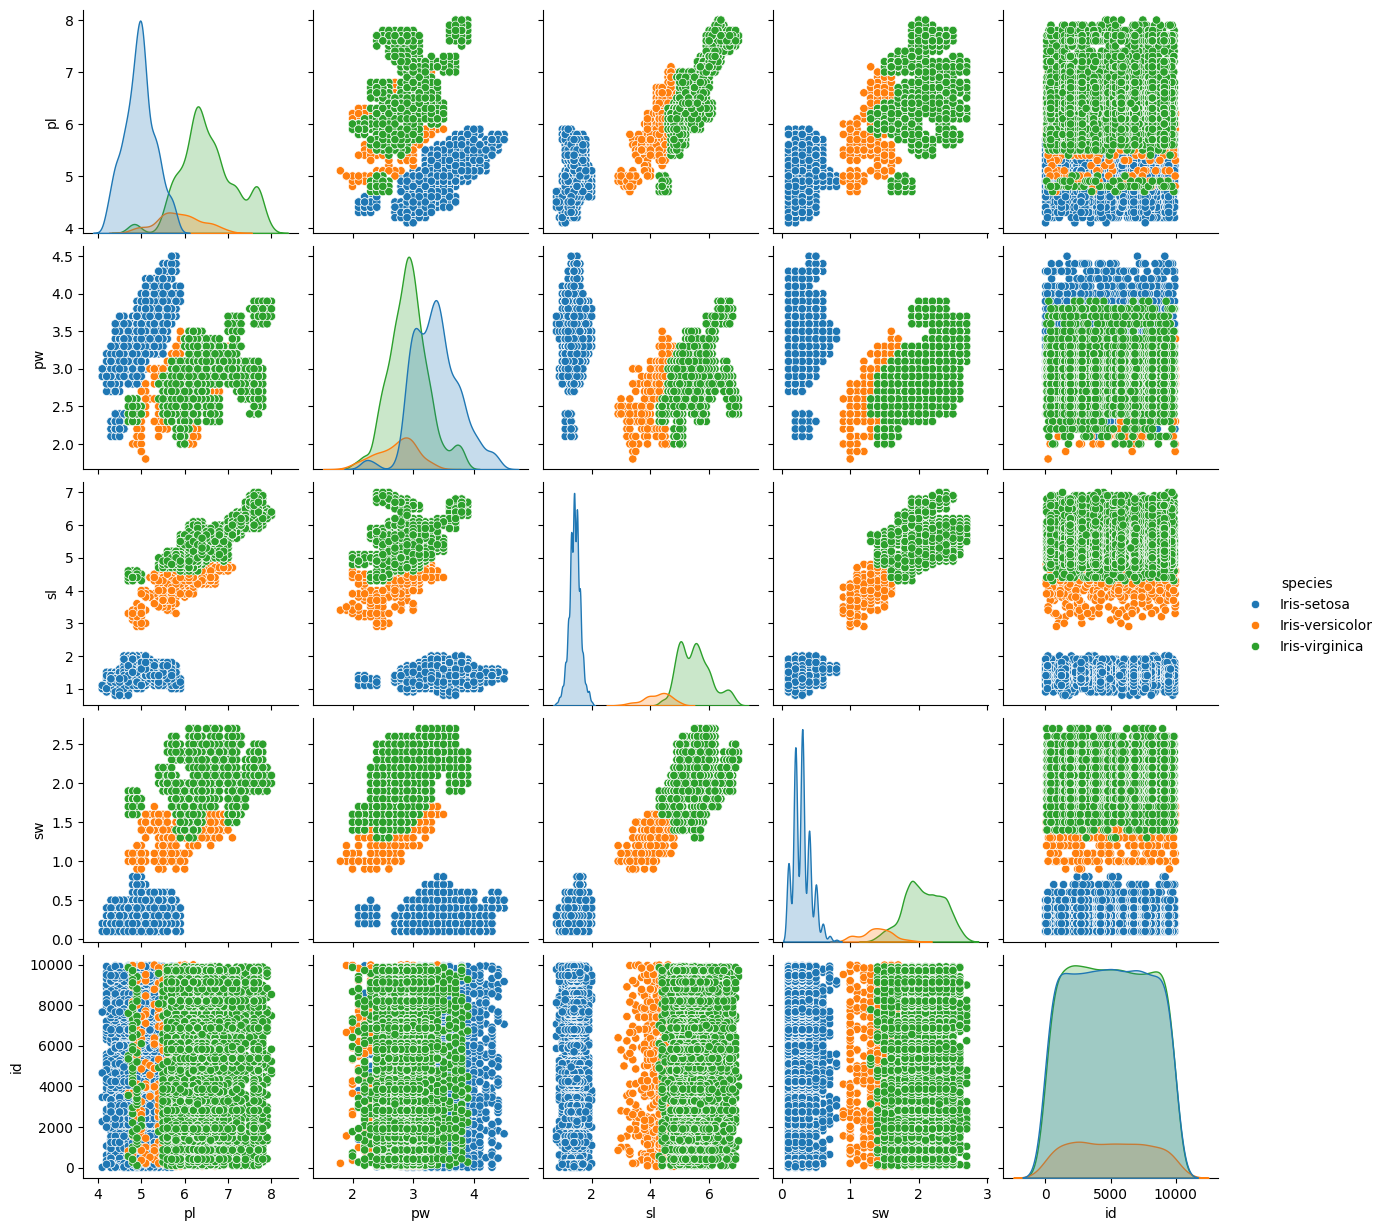

In [4]:
#task 3
data = data[data["sw"]!=-9999]
data = data[data["sl"]!=-9999]

pivot = data.pivot_table(
    values="sl",
    index="species",
    aggfunc=["mean", "std"]
) 
print(pivot[["mean","std"]])
data = data[data["sw"]<15]
data = data[data["sl"]<15]

pivot = data.pivot_table(
    values="sl",
    index="species",
    aggfunc=["mean", "std"]
) 
print(pivot[["mean","std"]])
grid = sns.pairplot(data,hue="species")
grid.figure.show()



In [22]:
#task 4.1
numeric_data = data[[i for i in data.columns if data[i].dtypes != 'O' and i != "id"]]
minmax_scaled=MinMaxScaler().fit_transform(numeric_data)


scaled = StandardScaler().fit_transform(minmax_scaled)
pca = PCA()
pcaed_data = pca.fit_transform(scaled)

df = pd.DataFrame(pcaed_data)
df.columns = numeric_data.columns

# print(data)
new_data = data.copy()

new_data[numeric_data.columns] = df
# print(new_data)

# grid = sns.pairplot(new_data,hue="species")
# grid.figure.show()
print(sum(pca.explained_variance_ratio_[:2]))
pd.DataFrame(pca.components_,columns=["SepalL","SepalW","PetalL","PetalW"],index=["PC1","PC2","PC3","PC4"]).abs()

0.962603488729185


,SepalL,SepalW,PetalL,PetalW
PC1,0.519962,0.297933,0.573007,0.559051
PC2,0.381062,0.919498,0.054782,0.079457
PC3,0.710681,0.230514,0.128489,0.652140
PC4,0.281716,0.112347,0.807559,0.505828


             0         1      species
0    -1.894612  0.365597  Iris-setosa
1    -1.655899 -1.008093  Iris-setosa
2    -1.787902 -0.577327  Iris-setosa
3    -2.027029  0.570220  Iris-setosa
4    -1.509677  1.029314  Iris-setosa
...        ...       ...          ...
6486  2.365104 -0.111177  Iris-setosa
6487  2.183703  2.552635  Iris-setosa
6488  1.937482 -0.465358  Iris-setosa
6489  2.026507  1.340477  Iris-setosa
6490  1.599489 -0.509434  Iris-setosa

[6491 rows x 3 columns]


<Axes: xlabel='0', ylabel='1'>

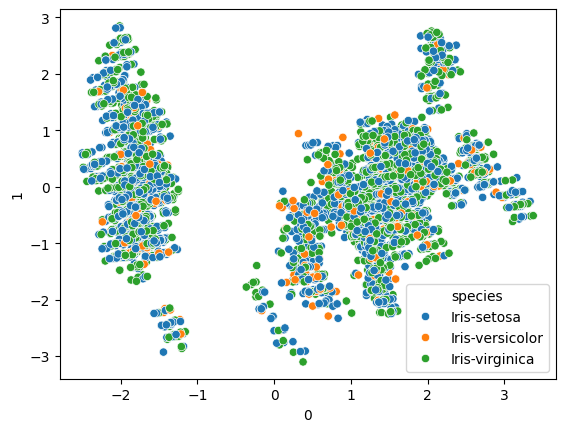

In [19]:
import matplotlib.pyplot as plt
numeric_data = data[[i for i in data.columns if data[i].dtypes != 'O' and i != "id"]]
minmax_scaled=MinMaxScaler().fit_transform(numeric_data)
scaled = StandardScaler().fit_transform(minmax_scaled)

pca = PCA(n_components=0.95)
pcaed_data = pd.DataFrame(pca.fit_transform(scaled))
pcaed_data["species"] = data["species"]

print(pcaed_data)

sns.scatterplot(pcaed_data, x=0, y=1, hue="species")

In [14]:
#task 4.2
numeric_data = data[[i for i in data.columns if data[i].dtypes != 'O' and i != "id"]]
minmax_scaled_pd=MinMaxScaler().fit_transform(pd.DataFrame(numeric_data["pl"]), [(0,100), (0,1), (0,1), (0,1)])
minmax_scaled_other=MinMaxScaler().fit_transform(numeric_data[[i for i in numeric_data.columns if i != "pd"]], [(0,100), (0,1), (0,1), (0,1)])

minmax_scaled = minmax_scaled_pd + minmax_scaled_other

scaled = StandardScaler().fit_transform(minmax_scaled)
pca = PCA()
pcaed_data = pca.fit_transform(scaled)

df_strange_scale = pd.DataFrame(pcaed_data)
df_strange_scale.columns = numeric_data.columns

print(pca.explained_variance_ratio_)
print(sum(pca.explained_variance_ratio_[:2]))
pd.DataFrame(pca.components_,columns=["SepalL","SepalW","PetalL","PetalW"],index=["PC1","PC2","PC3","PC4"]).abs().mean(axis=0)

[0.87860178 0.11146925 0.00821623 0.00171274]
0.9900710265009215


SepalL    0.426773
SepalW    0.410696
PetalL    0.429903
PetalW    0.489582
dtype: float64

In [9]:
#task 4.6
numeric_data = data[[i for i in data.columns if data[i].dtypes != 'O' and i != "id"]]

numeric_data.loc[0, "pl"] = 5000
minmax_scaled=MinMaxScaler().fit_transform(numeric_data)


scaled = StandardScaler().fit_transform(minmax_scaled)
pca = PCA()
pcaed_data = pca.fit_transform(scaled)

df_outlier = pd.DataFrame(pcaed_data)
df_outlier.columns = numeric_data.columns

print(pca.explained_variance_ratio_)

print(sum(pca.explained_variance_ratio_[:2]))
pd.DataFrame(pca.components_,columns=["SepalL","SepalW","PetalL","PetalW"],index=["PC1","PC2","PC3","PC4"]).abs().mean(axis=0)

[0.56703734 0.25004086 0.17420332 0.00871849]
0.8170781920803774


C:\Users\otto.hammar\AppData\Local\Temp\ipykernel_14948\4137702820.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numeric_data.loc[0, "pl"] = 5000


SepalL    0.256812
SepalW    0.349518
PetalL    0.411205
PetalW    0.419716
dtype: float64

In [71]:
# task 5.1
sample = new_data.sample(n=150)
print(sample["species"].value_counts())
print(any(sample["id"].value_counts()>1))

# print(sample.pivot_table(values=["pl", "pw", "sw", "sl"], index="species"))

#task 5.2
sample = new_data.sample(n=150, replace=True)
print(sample["species"].value_counts())
print(any(sample["id"].value_counts()>1))

#task 5.3
sample = new_data.groupby("species",group_keys=False).apply(lambda x:x.sample(frac=0.5))
print(sample["species"].value_counts())
print(any(sample["id"].value_counts()>1))

#task 5.4
sample = new_data.groupby("species",group_keys=False).apply(lambda x:x.sample(50))
print(sample["species"].value_counts())
print(any(sample["id"].value_counts()>1))

species
Iris-setosa        69
Iris-virginica     68
Iris-versicolor    13
Name: count, dtype: int64
False
species
Iris-virginica     71
Iris-setosa        70
Iris-versicolor     9
Name: count, dtype: int64
True
species
Iris-setosa        1498
Iris-virginica     1498
Iris-versicolor     250
Name: count, dtype: int64
False
species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64
False


C:\Users\otto.hammar\AppData\Local\Temp\ipykernel_14948\1626150728.py:14: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sample = new_data.groupby("species",group_keys=False).apply(lambda x:x.sample(frac=0.5))
C:\Users\otto.hammar\AppData\Local\Temp\ipykernel_14948\1626150728.py:19: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sample = new_data.groupby("species",group_keys=False).apply(lambda x:x.sample(50))
